In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Write functions to generate all valid combinations of two, three, and four numbers (1-7) and their possible KenKen clues.
**For a two-number section, a clue can be +, -, \*, or /**


**For a three- or four-number section, a clue can only be + or \***


**In a three- or four-number section, one number can be repeated.**

In [210]:
kenken = np.array(range(1,8))
nums_b = np.array(range(1,8))
nums_c = np.array(range(1,8))
nums_d = np.array(range(1,8))

In [290]:
## Output will be a list of sums, a list of products, a list of differences, and a list of quotients.

## Any pair of different numbers can be added, multiplied, or subtracted. The list of possible pairs for division is smaller.

def pairs_ls(l):
    pairs = []
    for n in l:
        for b in nums_b:
            pair = [n,b]
            if b > n and sorted(pair) not in pairs: #use > instead of != for ease later with subtraction list
                pairs.append(sorted(pair))
    return pairs
    
def twos_add(l):
    pairs = pairs_ls(l)
    return [n+b for [n,b] in pairs]

def twos_mult(l):
    pairs = pairs_ls(l)
    return [n*b for [n,b] in pairs]
    
def twos_sub(l):
    pairs = pairs_ls(l)
    return [b-n for [n,b] in pairs]
                
def twos_div(l):
    pairs = pairs_ls(l)
    return [int(b/n) for [n,b] in pairs if b%n == 0]

def div_pairs(l):
    pairs = pairs_ls(l)
    return [[n,b] for [n,b] in pairs if b%n == 0]

def div_dict(l):
    pairs = pairs_ls(l)
    return {str([n,b]):int(b/n) for [n,b] in pairs if b%n == 0}

In [287]:
div_dict(kenken)

{'[1, 2]': 2,
 '[1, 3]': 3,
 '[1, 4]': 4,
 '[1, 5]': 5,
 '[1, 6]': 6,
 '[1, 7]': 7,
 '[2, 4]': 2,
 '[2, 6]': 3,
 '[3, 6]': 2}

In [265]:
twos_div(kenken)
#print(f'add length: {len(twos_add)}, mult length: {len(twos_mult)}, sub length: {len(twos_sub)}, div len: {len(twos_div)}')

[2, 3, 4, 5, 6, 7, 2, 3, 2]

In [319]:
## Output will be a list of sums and a list of products

def get_triplets(l):
    triplets = []
    for n in l:
        for b in nums_b:
            for c in nums_c:
                triplet = [n,b,c]
                if len(set(triplet)) < 2:
                    continue
                else: 
                    if sorted(triplet) not in triplets:
                        triplets.append(sorted(triplet))
    return triplets

def threes_add(l):
    trip = get_triplets(l)
    return [n+b+c for [n,b,c] in trip]

def threes_mult(l): 
    trip = get_triplets(l)
    return [n*b*c for [n,b,c] in trip] 

In [320]:
## Output will be a list of sums and a list of products

def get_quads(l):
    quads = []
    for n in l:
        for b in nums_b:
            for c in nums_c:
                for d in nums_d:
                    quad = [n,b,c,d]
                    cts = [quad.count(x) for x in quad]
                    if 3 in cts or 4 in cts:
                        continue
                    else: 
                        if sorted(quad) not in quads:
                            quads.append(sorted(quad))
    return quads
                            
def quads_add(l):
    quads = get_quads(l)
    return [n+b+c+d for [n,b,c,d] in quads]

def quads_mult(l):
    quads = get_quads(l)
    return [n*b*c*d for [n,b,c,d] in quads]

## 2. Plot the frequency of values in each list

[1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1, 1]


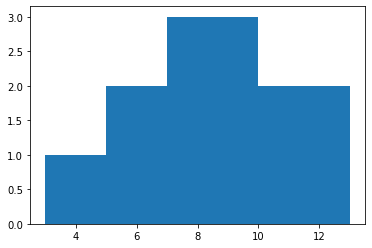

In [215]:
sums_two = twos_add(kenken)
sums_two_freq = [sums_two.count(n) for n in sums_two]
print(sums_two_freq)
plt.hist(sums_two);

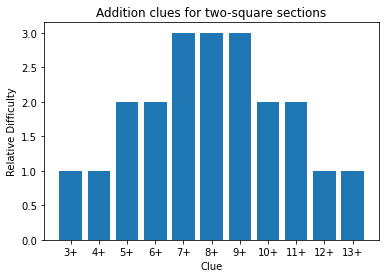

In [238]:
clues = list(set(sums_two))
freq = [sums_two.count(x) for x in clues]
label = [str(n)+'+' for n in clues]
plt.bar(x=clues, height = freq, tick_label = label)
plt.ylabel('Relative Difficulty')
plt.xlabel('Clue')
plt.title('Addition clues for two-square sections');

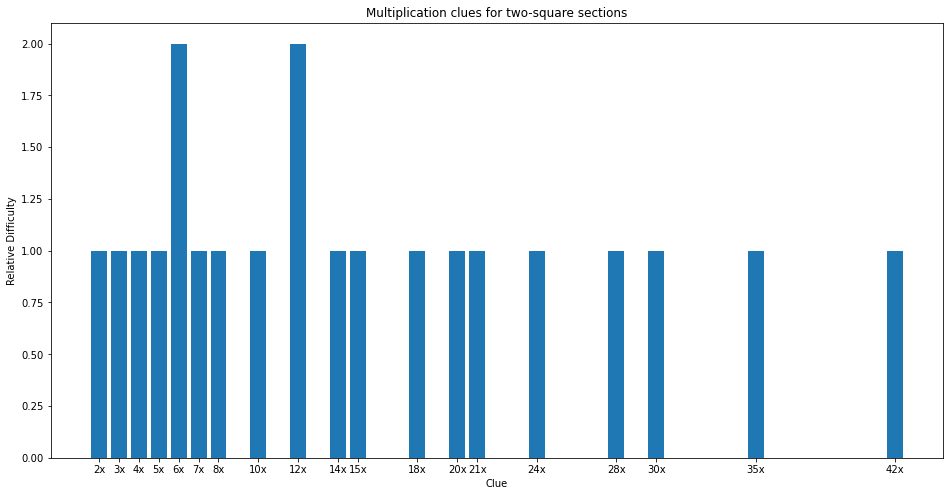

In [243]:
prod_twos = twos_mult(kenken)
clues = list(set(prod_twos))
freq = [prod_twos.count(x) for x in clues]
label = [str(n)+'x' for n in clues]
fig = plt.figure(figsize=(16, 8))
plt.bar(x=clues, height = freq, tick_label = label)
plt.ylabel('Relative Difficulty')
plt.xlabel('Clue')
plt.title('Multiplication clues for two-square sections');

## Create DataFrame of duos, triplets, and quads and their clue options

In [222]:
#clues = set([str(n)+'+' for n in sums_two])
twos = pd.DataFrame(index = set(sums_two))
twos

""
3
4
5
6
7
8
9
10
11
12


In [304]:
sums = twos_add(kenken)
prod = twos_mult(kenken)
diff = twos_sub(kenken)
quot = div_dict(kenken) # for division, use a dictionary because quotient is null for some combos

duo_string = [str(x) for x in p]

duo_df = pd.DataFrame(duo_string)
duo_df.rename(columns={0:'values'}, inplace=True)
duo_df['+'] = sums
duo_df['x'] = prod
duo_df['-'] = diff
duo_df['/'] = duo_df['values'].map(quot)
duo_df

,values,+,x,-,/
0,"[1, 2]",3,2,1,2.0
1,"[1, 3]",4,3,2,3.0
2,"[1, 4]",5,4,3,4.0
3,"[1, 5]",6,5,4,5.0
4,"[1, 6]",7,6,5,6.0
5,"[1, 7]",8,7,6,7.0
6,"[2, 3]",5,6,1,NaN
7,"[2, 4]",6,8,2,2.0
8,"[2, 5]",7,10,3,NaN
9,"[2, 6]",8,12,4,3.0


In [322]:
sums = threes_add(kenken)
prod = threes_mult(kenken)
trip_string = [str(x) for x in get_triplets(kenken)]

trip_df = pd.DataFrame(trip_string)
trip_df.rename(columns={0:'values'}, inplace=True)
trip_df['+'] = sums
trip_df['x'] = prod
trip_df

,values,+,x
0,"[1, 1, 2]",4,2
1,"[1, 1, 3]",5,3
2,"[1, 1, 4]",6,4
3,"[1, 1, 5]",7,5
4,"[1, 1, 6]",8,6
...,...,...,...
72,"[5, 6, 6]",17,180
73,"[5, 6, 7]",18,210
74,"[5, 7, 7]",19,245
75,"[6, 6, 7]",19,252


In [330]:
quad_string = [str(x) for x in get_quads(kenken)]
sums_4 = quads_add(kenken)
prod_4 = quads_mult(kenken)

q_df = pd.DataFrame(data = quad_string, columns = ['values'])
q_df['+'] = sums_4
q_df['x'] = prod_4
q_df

,values,+,x
0,"[1, 1, 2, 2]",6,4
1,"[1, 1, 2, 3]",7,6
2,"[1, 1, 2, 4]",8,8
3,"[1, 1, 2, 5]",9,10
4,"[1, 1, 2, 6]",10,12
...,...,...,...
156,"[5, 5, 6, 7]",23,1050
157,"[5, 5, 7, 7]",24,1225
158,"[5, 6, 6, 7]",24,1260
159,"[5, 6, 7, 7]",25,1470


In [300]:
# For division, create a dictionary where keys are pairs of numbers and values are frequency of the quotient
quot = twos_div(kenken)
pairs = div_pairs(kenken) 
quot_freq = {str([a,b]):quot.count(b) for [a,b] in pairs}

## note: this was unnecessary lol

In [331]:
all_kenken = pd.concat([duo_df, trip_df, q_df], axis=0)
all_kenken

,values,+,x,-,/
0,"[1, 2]",3,2,1.0,2.0
1,"[1, 3]",4,3,2.0,3.0
2,"[1, 4]",5,4,3.0,4.0
3,"[1, 5]",6,5,4.0,5.0
4,"[1, 6]",7,6,5.0,6.0
...,...,...,...,...,...
156,"[5, 5, 6, 7]",23,1050,NaN,NaN
157,"[5, 5, 7, 7]",24,1225,NaN,NaN
158,"[5, 6, 6, 7]",24,1260,NaN,NaN
159,"[5, 6, 7, 7]",25,1470,NaN,NaN


In [332]:
# remove high products (i have never seen over 200)

## Use Seaborn to visualize frequency/difficulty as a heatmap